In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#libs for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

#libs for regression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm #know how to properly do it in R, but this one suppose to be a good replacement 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#libs for classification
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

random_state = 42 #for consistency

In [3]:
data = pd.read_csv('data\concrete.csv')
print(data.shape)
data.head()

(1030, 9)


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\lebed\AppData\Local\Temp\ipykernel_21704\1435676111.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('data\concrete.csv')


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Data examination

For this project I wanted to do a deep dive into the properties of concrete. For this I found Civil Engineering: Cement Manufacturing Dataset.  
https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset/data  
Good introductory video on the subject: https://youtu.be/UOHURuAf5iY?si=FtpTnXfgkeiXhPPc  


Columns description:  
Cement - measured in kg in a m3 mixture  
Slag (blast furnace slag) - measured in kg in a m3 mixture  
Ash (fly ash) - measured in kg in a m3 mixture  
Water - measured in kg in a m3 mixture  
Superplastic (superplasticizer) - measured in kg in a m3 mixture  
Coarseagg (coarse aggregate, usually gravel) - measured in kg in a m3 mixture  
Fineagg (fine aggregate, usually sand) - measured in kg in a m3 mixture  
Age - day (1-365)  
Strength (concrete compressive strength) - measured in MPa  

For the examination, I'll check:
1. Missing values
2. Duplicates
3. Distribution of data
4. Identify and potential outliers

In [4]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.duplicated().sum()

25

In [7]:
data[data.duplicated()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


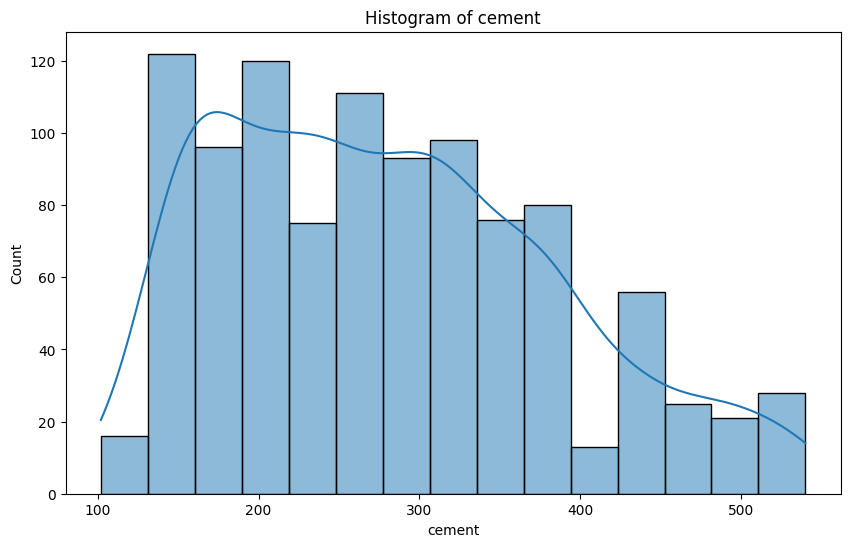

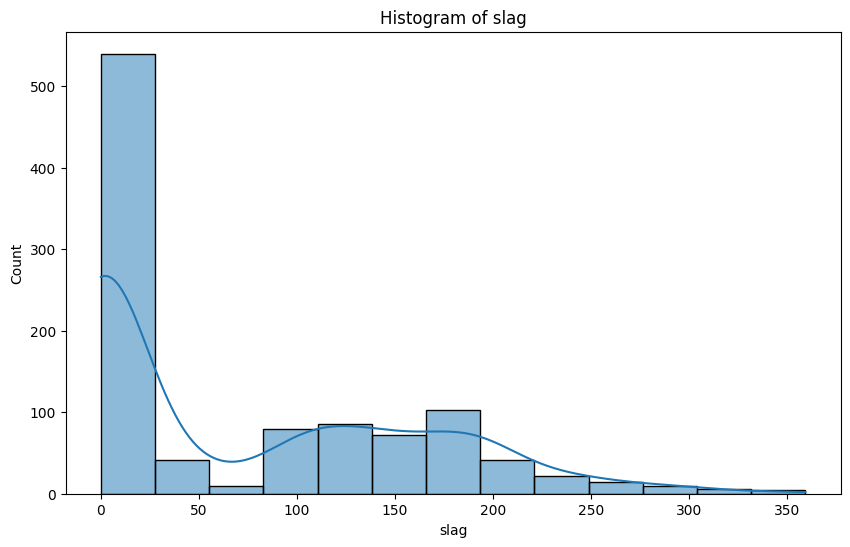

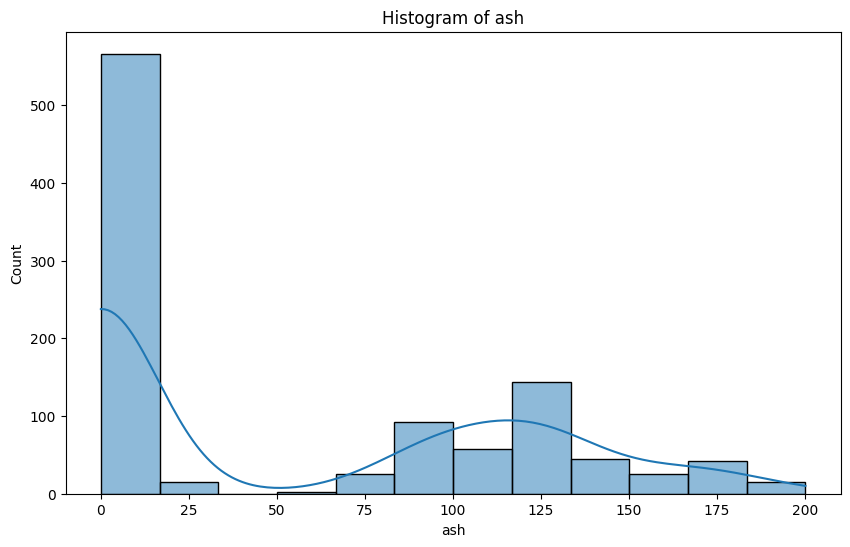

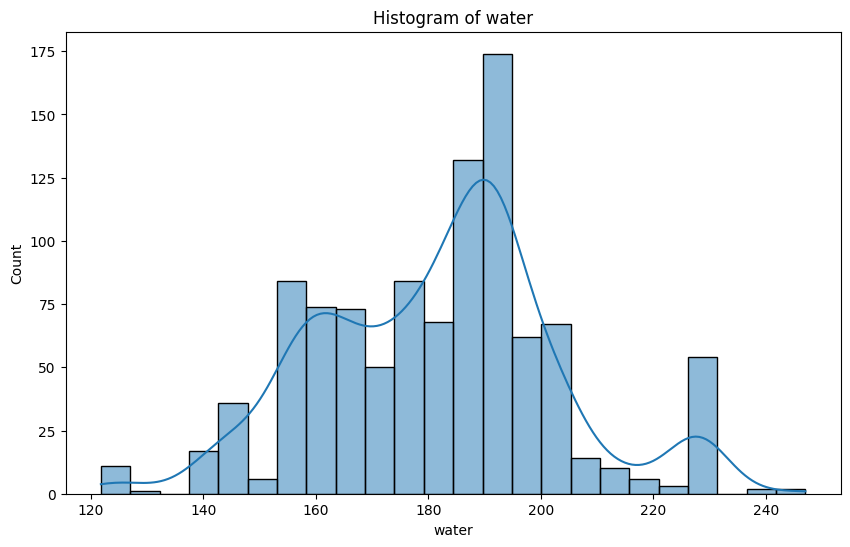

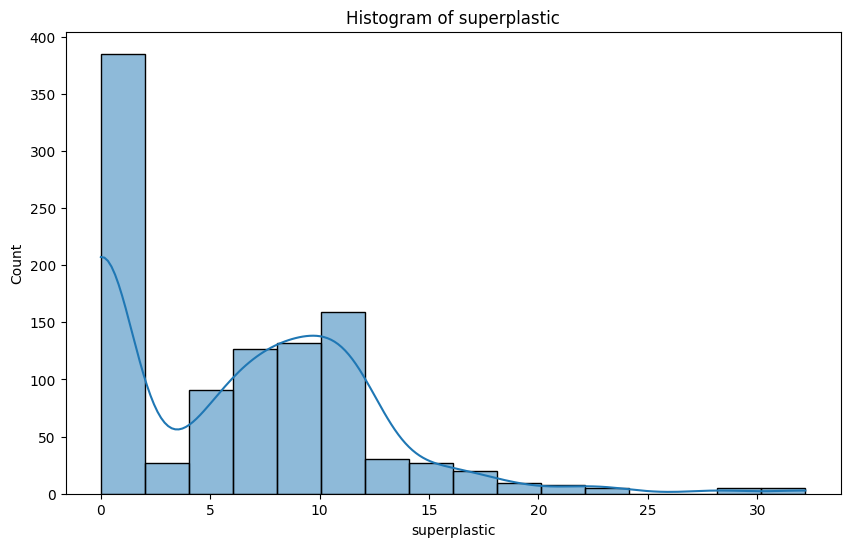

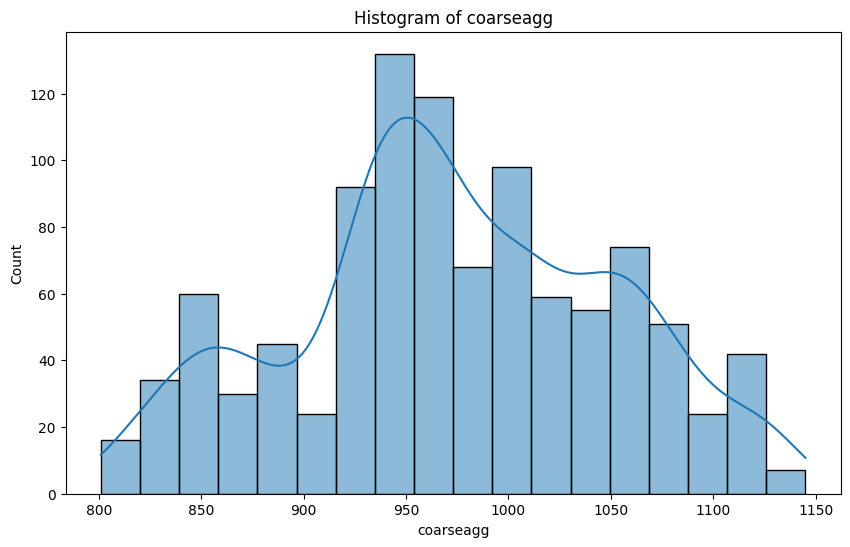

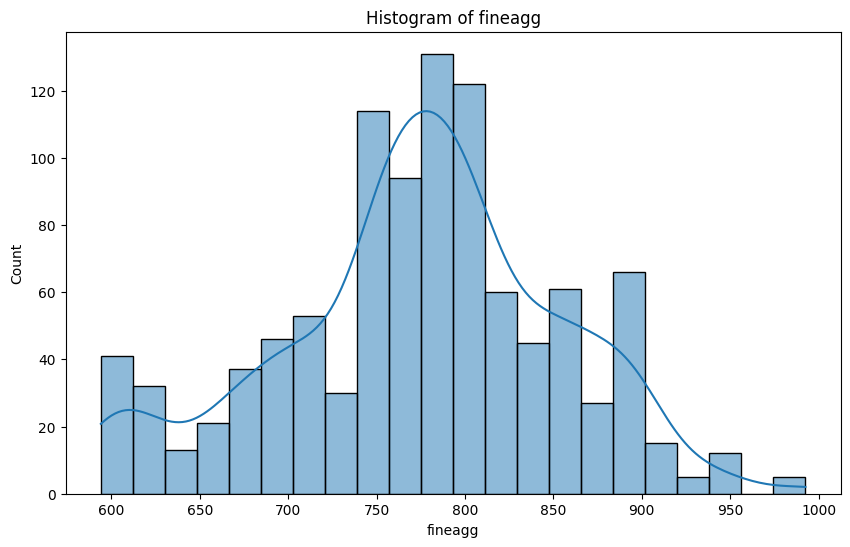

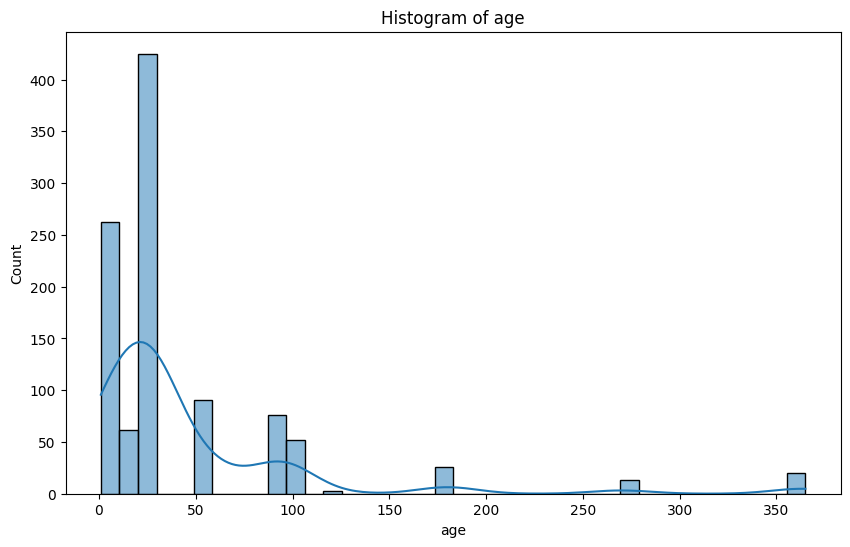

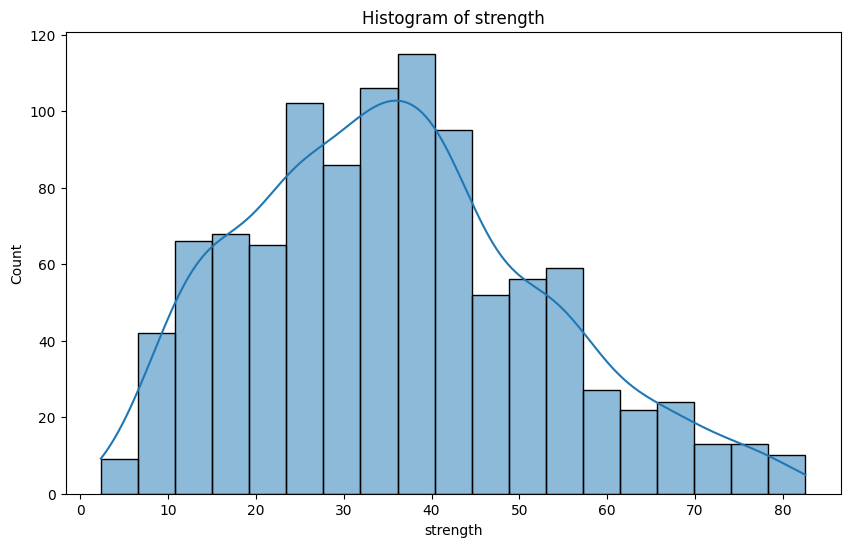

In [8]:
plt.figure(figsize=(10,6))
plt.title('Histogram of cement')
sns.histplot(data=data,x='cement', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of slag')
sns.histplot(data=data,x='slag', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of ash')
sns.histplot(data=data,x='ash', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of water')
sns.histplot(data=data,x='water', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of superplastic')
sns.histplot(data=data,x='superplastic', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of coarseagg')
sns.histplot(data=data,x='coarseagg', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of fineagg')
sns.histplot(data=data,x='fineagg', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of age')
sns.histplot(data=data,x='age', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of strength')
sns.histplot(data=data,x='strength', kde=True);

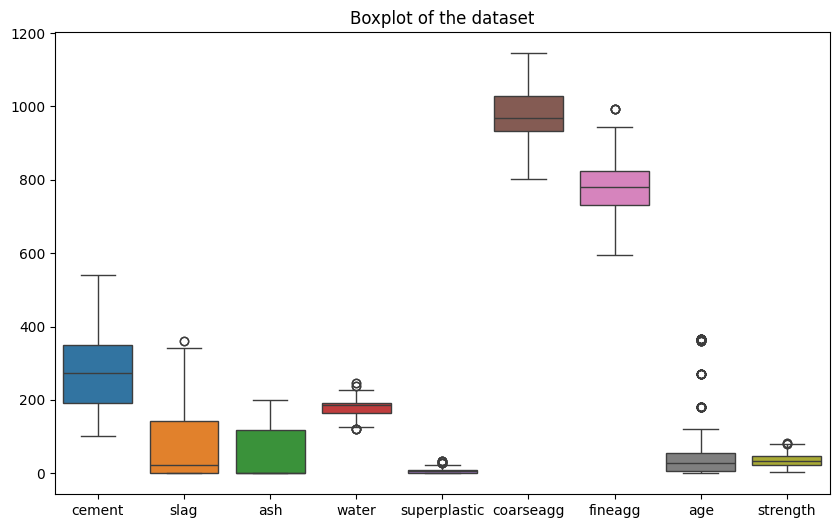

In [9]:
plt.figure(figsize=(10,6))
plt.title('Boxplot of the dataset')
sns.boxplot(data=data);

There are a few outliers in certain features:
* slag
* water
* superplastic
* age  
* fineagg  

Besides this there are a few fetures with far from normal distributions:
* slag
* ash
* superplastic
* age  

For substance features, we can see that they are not commonly used and if we do not account for cases when the amount is eqal to zero, we can see a resemblance of normal distribution.

<Axes: title={'center': 'Boxplot of fineagg'}, xlabel='fineagg'>

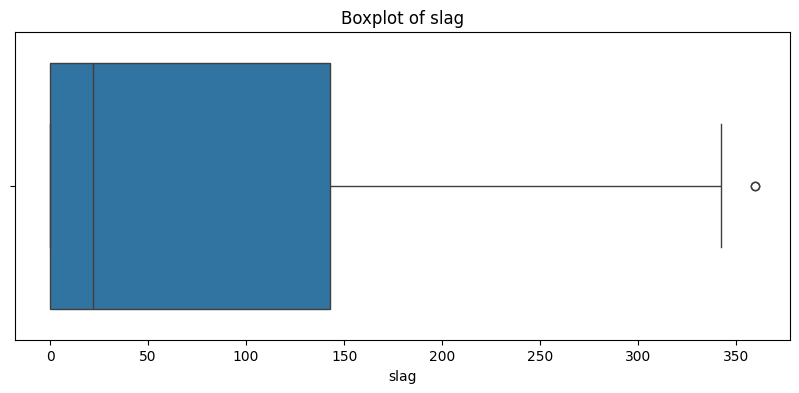

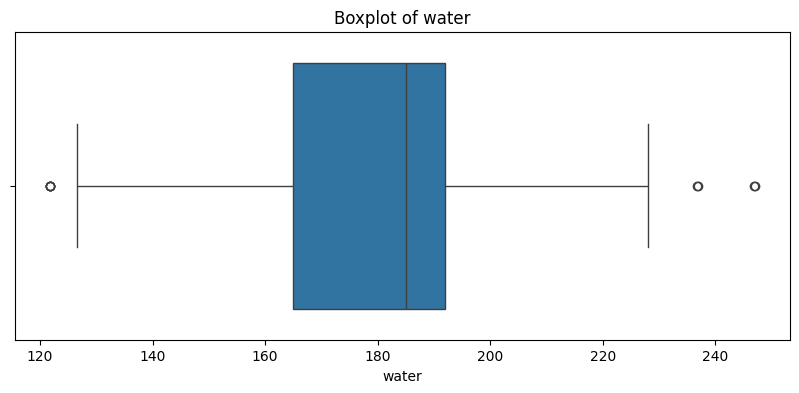

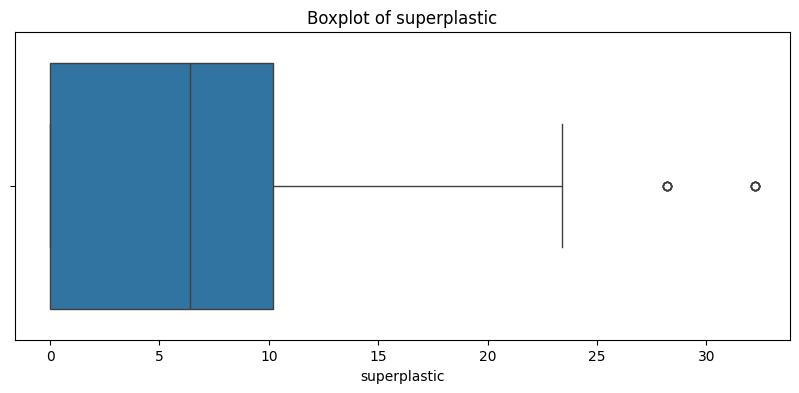

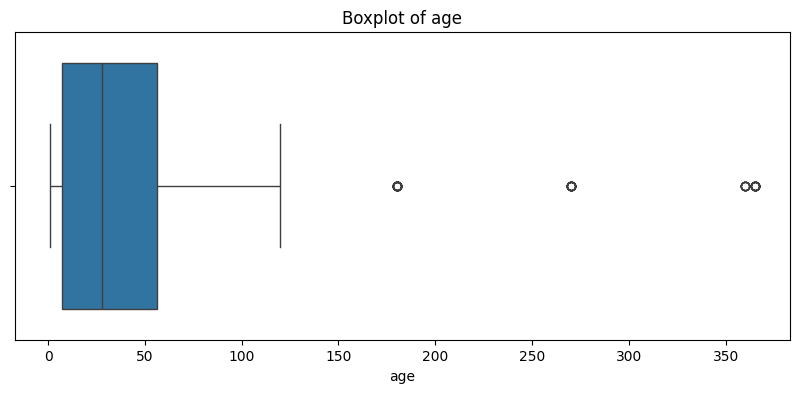

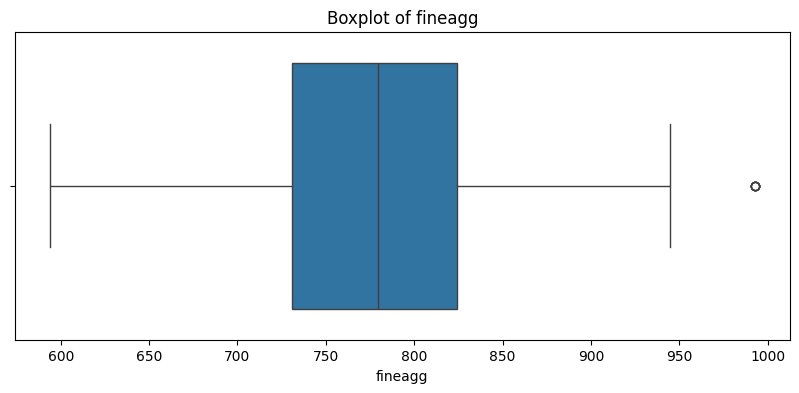

In [10]:
plt.figure(figsize=(10,4))
plt.title('Boxplot of slag')
sns.boxplot(data=data, x='slag');

plt.figure(figsize=(10,4))
plt.title('Boxplot of water')
sns.boxplot(data=data, x='water')

plt.figure(figsize=(10,4))
plt.title('Boxplot of superplastic')
sns.boxplot(data=data, x='superplastic')

plt.figure(figsize=(10,4))
plt.title('Boxplot of age')
sns.boxplot(data=data, x='age')

plt.figure(figsize=(10,4))
plt.title('Boxplot of fineagg')
sns.boxplot(data=data, x='fineagg')

In [11]:
data[data['slag'] > 350]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [12]:
data[(data['water'] > 230) | (data['water'] < 125)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


In [13]:
data[data['superplastic'] > 25]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


In [14]:
data[data['fineagg'] > 950]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


In [15]:
data[data['age'] > 150]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Improving the dataset
1) Outliers - the number of outliers in substance variable is small, so it'll easier to drop them
2) Duplicates - Drop them
3) Time - as I'm more interested in the strength properties o deferent alloys and do not plan to examine time series data, I'll drop them. In order to make the data more reliable (I saw a few observations with similar alloys and different time), I'll combine the observations of the same alloys over time, and taking the mean value of the strength.
4) Distributions - I believe that proportions of substances used in the alloy play a key role in defining the properties of the end result. As such I'll engage in feature engineering and add variables that would represent proportions in the alloy.
5) Distributions with high number of zeroes - I think it will be rational to add boolean variable that would indicate if the material was used or not. Later I'll se if this can be a better mantric than the original one.

## Removal of outliers

In [16]:
data = data.loc[data['slag'] < 350]
data = data.loc[(data['water'] > 125) & (data['water'] < 230)]
data = data.loc[data['superplastic'] <= 25]
data = data.loc[data['fineagg'] <= 950]

In [17]:
#As my dataset is extremely small, I've chosen a big number for the amount of regressors (in order to preserve more observations)
outliers = IsolationForest(n_estimators=200, random_state=random_state).fit_predict(data.values)

outliers = (outliers+1)//2
print('% of outliers with Isolation forest:', 1 - (np.sum(outliers) / data.shape[0]) * 100)
g
data = data.loc[np.array(data.index)[outliers == 1]]
data.shape

% of outliers with Isolation forest: -73.9003984063745


(752, 9)

## Duplicates

In [18]:
data.drop_duplicates(inplace=True)
data.shape

(737, 9)

## Removal of time variable 

<Axes: title={'center': 'Plot of age vs strength'}, xlabel='age', ylabel='strength'>

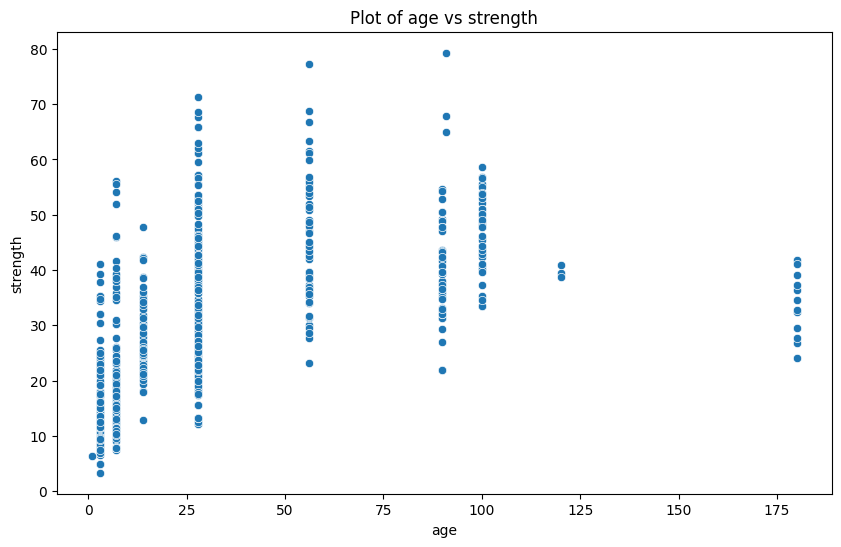

In [19]:
#just want to see the actual correlation between time and strength
plt.figure(figsize=(10,6))
plt.title('Plot of age vs strength')
sns.scatterplot(data=data, x='age', y= 'strength')
#looks like there is a nonlinear correlation 

In [20]:
data = data.groupby(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg'])['strength'].mean().reset_index()

In [21]:
print(data.shape) #the dataset got 2 times smaller
extendedData = data.copy()

(328, 8)


## Proportions

In [22]:
cols = extendedData.columns
cols = cols[:-1]#removing strenght
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        new_col_name = cols[i] + '_' + cols[j] + '_proportion'
        extendedData[new_col_name] = extendedData.apply(lambda x: x[cols[i]] / x[cols[j]] if x[cols[j]] > 0 else 0, axis=1)
extendedData.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,cement_slag_proportion,cement_ash_proportion,...,ash_water_proportion,ash_superplastic_proportion,ash_coarseagg_proportion,ash_fineagg_proportion,water_superplastic_proportion,water_coarseagg_proportion,water_fineagg_proportion,superplastic_coarseagg_proportion,superplastic_fineagg_proportion,coarseagg_fineagg_proportion
0,108.3,162.4,0.0,203.5,0.0,938.2,849.0,14.1550,0.666872,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.216905,0.239694,0.000000,0.000000,1.105065
1,116.0,173.0,0.0,192.0,0.0,909.8,891.9,22.3500,0.670520,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.211035,0.215271,0.000000,0.000000,1.020070
2,122.6,183.9,0.0,203.5,0.0,958.2,800.1,17.7875,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.212377,0.254343,0.000000,0.000000,1.197600
3,133.0,200.0,0.0,192.0,0.0,927.4,839.2,21.2500,0.665000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.207030,0.228789,0.000000,0.000000,1.105100
4,133.0,210.0,0.0,196.0,3.0,949.0,795.0,31.0300,0.633333,0.0,...,0.0,0.0,0.0,0.0,65.333333,0.206533,0.246541,0.003161,0.003774,1.193711


## Distributions with high number of zeroes

In [23]:
extendedData['isSlag'] = extendedData['slag'].apply(lambda x: 1 if x != 0 else 0)
extendedData['isAsh'] = extendedData['ash'].apply(lambda x: 1 if x != 0 else 0)
extendedData['isSuperplastic'] = extendedData['superplastic'].apply(lambda x: 1 if x != 0 else 0)
extendedData.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,cement_slag_proportion,cement_ash_proportion,...,ash_fineagg_proportion,water_superplastic_proportion,water_coarseagg_proportion,water_fineagg_proportion,superplastic_coarseagg_proportion,superplastic_fineagg_proportion,coarseagg_fineagg_proportion,isSlag,isAsh,isSuperplastic
0,108.3,162.4,0.0,203.5,0.0,938.2,849.0,14.1550,0.666872,0.0,...,0.0,0.000000,0.216905,0.239694,0.000000,0.000000,1.105065,1,0,0
1,116.0,173.0,0.0,192.0,0.0,909.8,891.9,22.3500,0.670520,0.0,...,0.0,0.000000,0.211035,0.215271,0.000000,0.000000,1.020070,1,0,0
2,122.6,183.9,0.0,203.5,0.0,958.2,800.1,17.7875,0.666667,0.0,...,0.0,0.000000,0.212377,0.254343,0.000000,0.000000,1.197600,1,0,0
3,133.0,200.0,0.0,192.0,0.0,927.4,839.2,21.2500,0.665000,0.0,...,0.0,0.000000,0.207030,0.228789,0.000000,0.000000,1.105100,1,0,0
4,133.0,210.0,0.0,196.0,3.0,949.0,795.0,31.0300,0.633333,0.0,...,0.0,65.333333,0.206533,0.246541,0.003161,0.003774,1.193711,1,0,1


In [24]:
column_to_move = extendedData.pop('strength')
extendedData['strength'] = column_to_move
extendedData.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'cement_slag_proportion', 'cement_ash_proportion',
       'cement_water_proportion', 'cement_superplastic_proportion',
       'cement_coarseagg_proportion', 'cement_fineagg_proportion',
       'slag_ash_proportion', 'slag_water_proportion',
       'slag_superplastic_proportion', 'slag_coarseagg_proportion',
       'slag_fineagg_proportion', 'ash_water_proportion',
       'ash_superplastic_proportion', 'ash_coarseagg_proportion',
       'ash_fineagg_proportion', 'water_superplastic_proportion',
       'water_coarseagg_proportion', 'water_fineagg_proportion',
       'superplastic_coarseagg_proportion', 'superplastic_fineagg_proportion',
       'coarseagg_fineagg_proportion', 'isSlag', 'isAsh', 'isSuperplastic',
       'strength'],
      dtype='object')

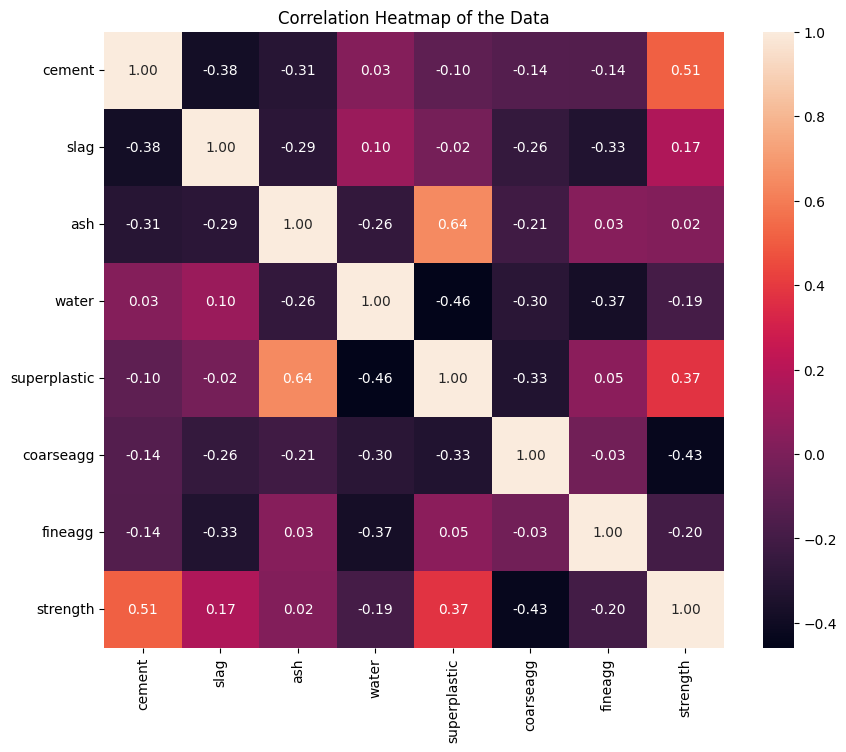

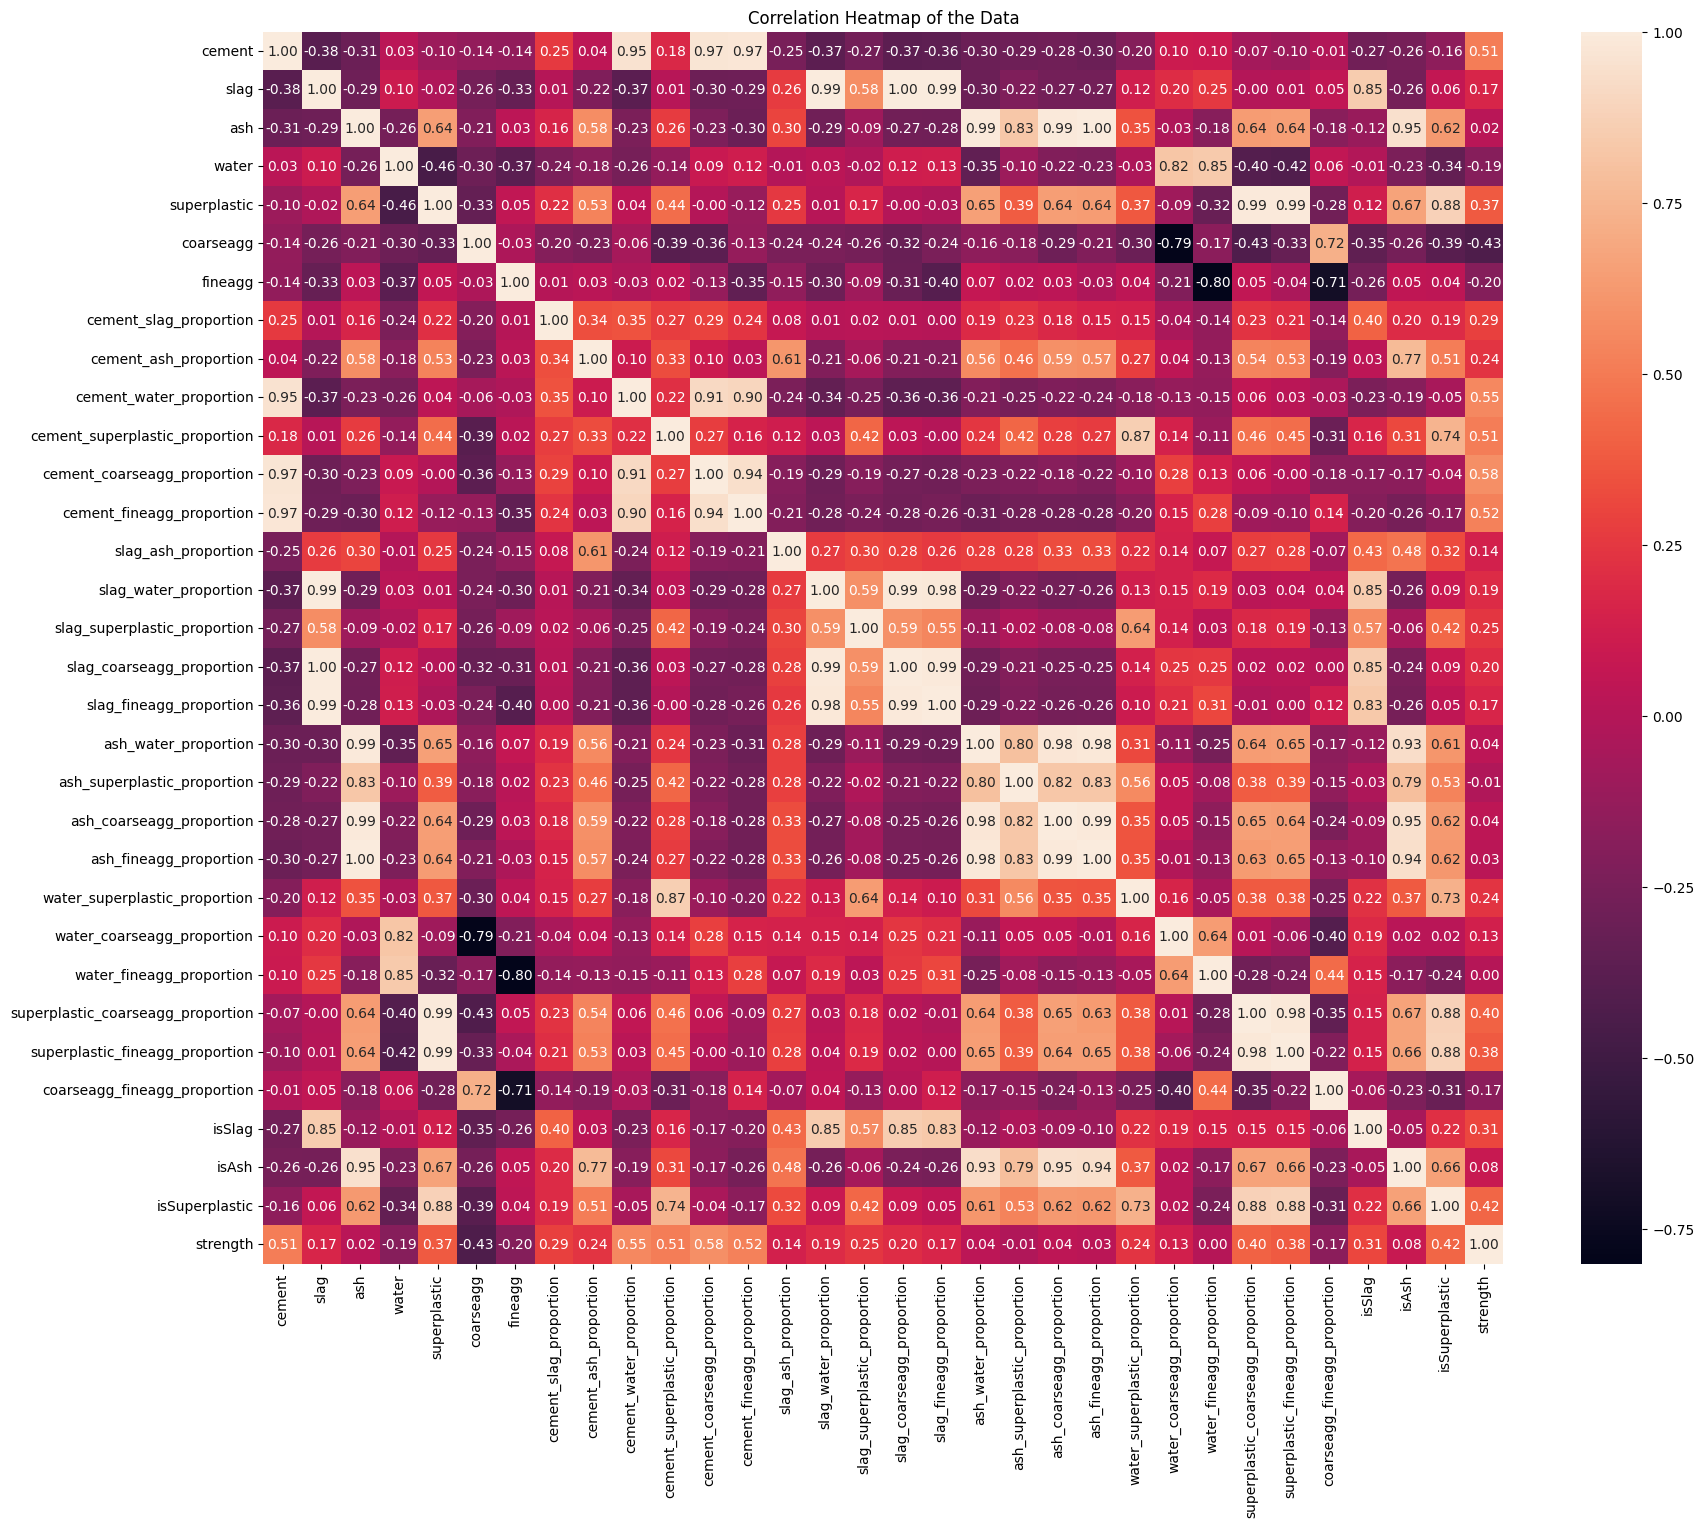

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of the Data')
plt.show()

plt.figure(figsize=(20, 16))
sns.heatmap(extendedData.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of the Data')
plt.show()

In [26]:
extendedData.corr()['strength'].sort_values()[:-1]

coarseagg                           -0.431140
fineagg                             -0.202363
water                               -0.192749
coarseagg_fineagg_proportion        -0.171353
ash_superplastic_proportion         -0.013689
water_fineagg_proportion             0.003194
ash                                  0.020923
ash_fineagg_proportion               0.025481
ash_water_proportion                 0.035432
ash_coarseagg_proportion             0.039952
isAsh                                0.084561
water_coarseagg_proportion           0.133816
slag_ash_proportion                  0.137415
slag                                 0.168143
slag_fineagg_proportion              0.168623
slag_water_proportion                0.192172
slag_coarseagg_proportion            0.199824
cement_ash_proportion                0.235133
water_superplastic_proportion        0.236218
slag_superplastic_proportion         0.246075
cement_slag_proportion               0.286630
isSlag                            

## Conclusion of preprocessing  
As a result, I have two datasets, one with extended number of features and the other one consisting of only original features. Both do not have time dependency.

# Clastering
I believe that there can be nonlinear dependencies between the the elements used for the concrete alloy and its strength, as such, I'll cluster the observations into the groups with minimal differences and evaluate their attributes to determine potential interesting combinations.

In [27]:
features = data.drop('strength', axis=1)

In [28]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

## Identifying best number of clusters  
I'll try different methods of identification, as they often can produce unreliable results. That being:
* Elbow Method
* Silhouette Score

In [29]:
distortions = []
K = range(2,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=random_state).fit(features)
    distortions.append(kmeanModel.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


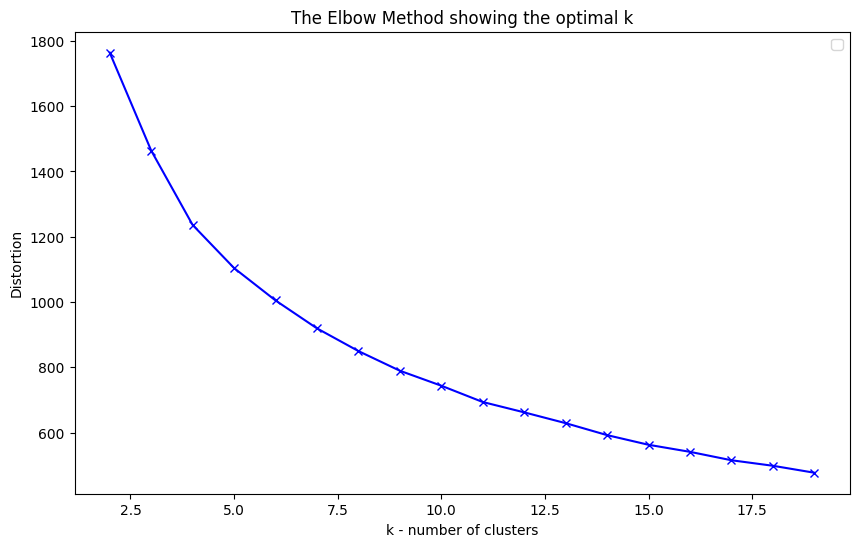

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

#No clear elbow, so I'll have to use another method 

In [31]:
silhouette_scores = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=random_state).fit(features)
    labels = kmeanModel.labels_
    silhouette_scores.append(silhouette_score(features, labels))

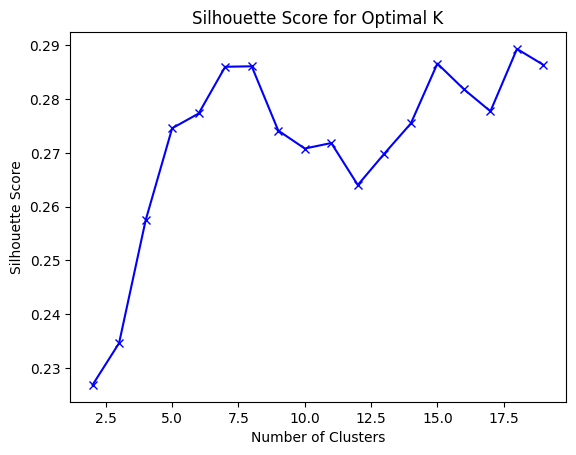

In [32]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [33]:
K = 7 #based on the silhouette score
kmeanModel = KMeans(n_clusters=K, random_state=random_state).fit(features)
cluster_labels = kmeanModel.labels_


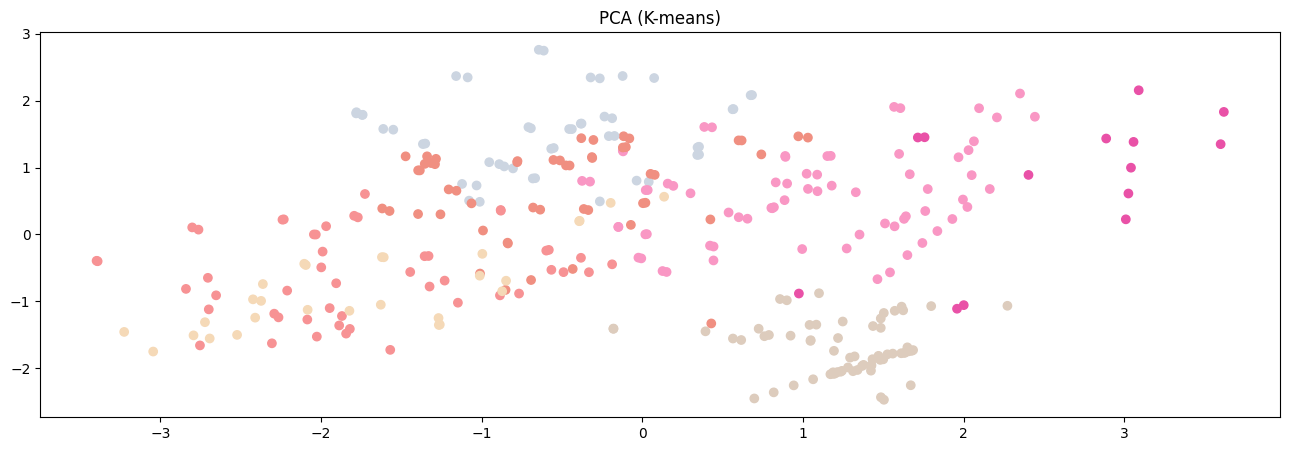

In [34]:
Y_pca = PCA(n_components=2).fit_transform(features)

np.random.seed(random_state-1)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(16,5))
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr)

In [35]:
data.insert(0, 'Klabels', cluster_labels)

group_0 = data.loc[data['Klabels'] == 0]
group_1 = data.loc[data['Klabels'] == 1]
group_2 = data.loc[data['Klabels'] == 2]
group_3 = data.loc[data['Klabels'] == 3]
group_4 = data.loc[data['Klabels'] == 4]
group_5 = data.loc[data['Klabels'] == 5]
group_6 = data.loc[data['Klabels'] == 6]

print('group 0:', len(group_0))
print('group 1:', len(group_1))
print('group 2:', len(group_2))
print('group 3:', len(group_3))
print('group 4:', len(group_4))
print('group 4:', len(group_5))
print('group 4:', len(group_6))

group 0: 65
group 1: 52
group 2: 71
group 3: 14
group 4: 28
group 4: 49
group 4: 49


In [36]:
g0 = group_0.mean()
g1 = group_1.mean()
g2 = group_2.mean()
g3 = group_3.mean()
g4 = group_4.mean()
g5 = group_5.mean()
g6 = group_6.mean()

means = pd.DataFrame({'g0': g0, 'g1': g1, 'g2': g2, 'g3': g3,'g4': g4, 'g5': g5,'g6': g6})
means

,g0,g1,g2,g3,g4,g5,g6
Klabels,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
cement,319.984615,307.361538,212.604225,346.114286,325.803571,196.353061,197.022449
slag,0.000000,52.728846,178.569014,93.264286,54.003571,136.844898,8.740816
ash,0.000000,90.776923,0.690141,0.000000,68.810714,107.493878,135.920408
water,188.487692,192.340385,186.481690,214.250000,156.950000,186.700000,171.281633
superplastic,0.555385,8.386538,3.959155,1.364286,11.260714,8.230612,8.842857
coarseagg,1031.430769,862.128846,975.311268,932.121429,963.142857,915.375510,1027.695918
fineagg,793.290769,785.501923,765.991549,675.771429,822.153571,736.916327,788.885714
strength,25.046728,38.398481,30.937085,41.055417,43.410048,34.206857,27.517466


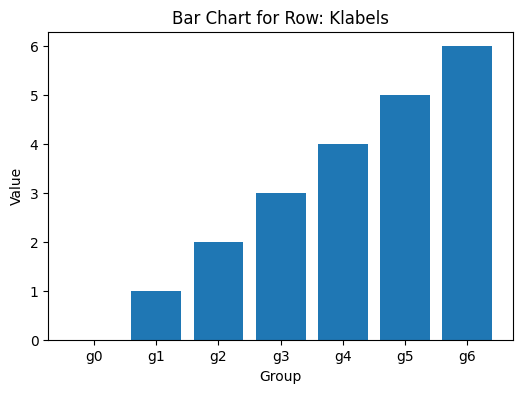

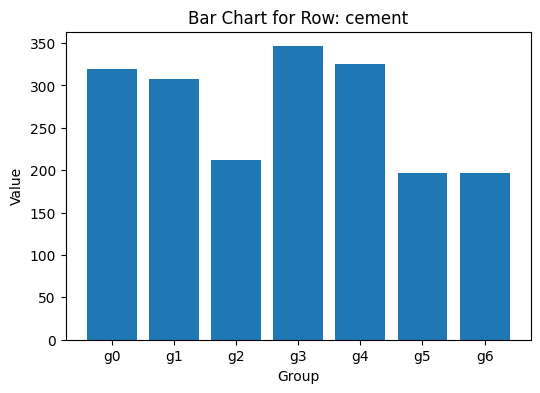

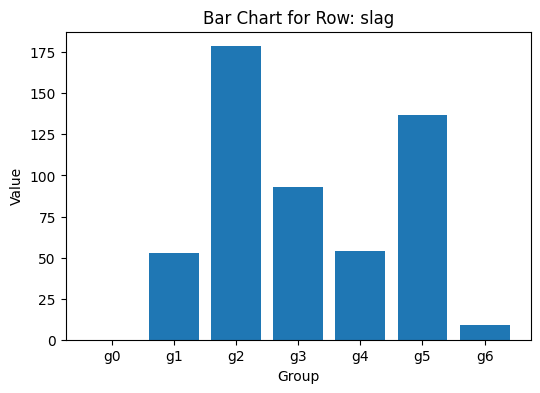

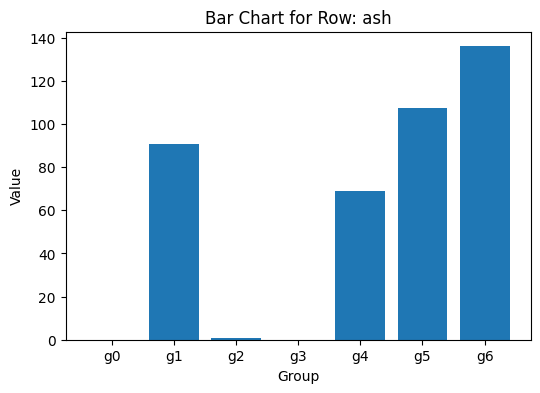

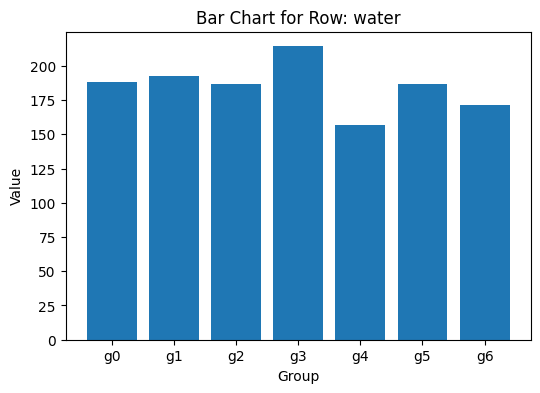

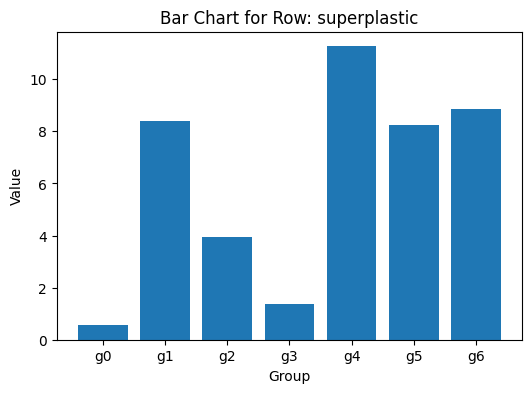

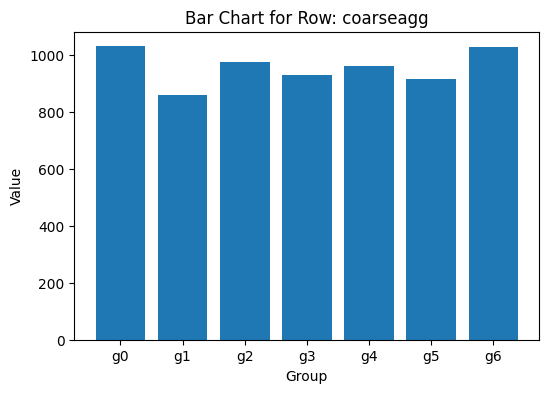

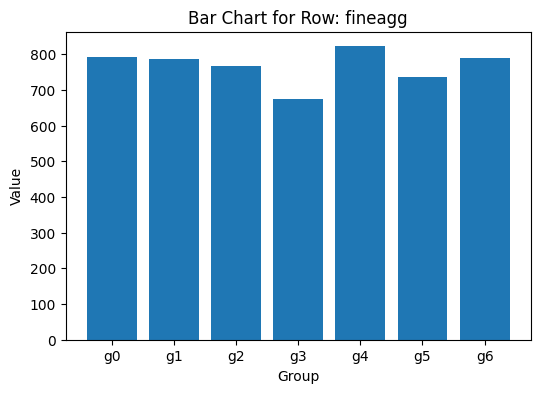

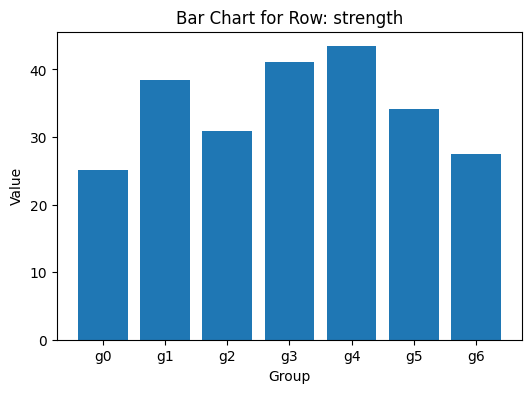

In [37]:
for index, row in means.iterrows():
    categories = row.index
    values = row.values
    # Create a bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(categories, values)
    plt.title(f'Bar Chart for Row: {index}')
    plt.xlabel('Group')
    plt.ylabel('Value')
    plt.show()

## The results:
We have 7 groups with the distinct alloys. Let's evaluate them from best to worst.

1) G4 (43.4) - an alloy with high use of cement and fineagg, and low use of slag and water. Pretty logical result, considering that water is the main diluter of concrete
2) G3 (41.1) - an alloy with the highest cement and water usage, has close to no ash and superplastic in it, and has lowest amount of fineagg in it. A bit more interesting, as we have a strong result with high water in the alloy. This is likely due to lower use of fineagg replaced by concrete or exclusion of admixtures for the structure.
3) G1 (38.4) - an alloy with high use of admixtures and water, and low use of coarseagg. This one is more interesting, as it has less cement in the structure and has lower amount of cement and coarseagg the n previous alloys. Despite this it retains high strength properties.
4) G5 (34.2) - an alloy with lowest amount of cement used relying on admixtures such as slag and ash. Particularly interesting alloy as it relies heavily on the admixtures to replace some of the fineagg and cement. It has lower strength stat, but can prove to be a promising alternative.
5) G2 (30.9) - a similar alloy to the G5, but relies purely on slag as a admixtures. The strength is significantly lower despite the higher use of cement compared to G5.
6) G6 (27.5) - an alloy with high use of ash and coarseagg, and low use of cement. Likly too "holey" due to low amount of cement and high use of ash and coarseagg.
7) G0 (25.1) - an alloy with no admixtures with one of the highest amounts of concrete and coarseagg. This case leads me to believe that there is a significant improvement of strength with the use of admixtures or overuse of coarseagg.

# Regression

In [38]:
X_ex = extendedData.drop(['strength'], axis = 1)
y_ex = extendedData['strength']

In [39]:
model = sm.OLS(y_ex, X_ex)
fmdl = model.fit()
fmdl.summary(title='Baseline model for Wine Quality dataset', alpha=.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Baseline model for Wine Quality dataset                        
=======================================================================================
Dep. Variable:               strength   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              416.7
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                   2.37e-225
Time:                        22:30:49   Log-Likelihood:                         -1003.7
No. Observations:                 328   AIC:                                      2069.
Df Residuals:                     297   BIC:                                      2187.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|       [0.05       0.95]
-----------------------------------------------------------------------------------------------------
cement                                0.4930      0.143      3.455      0.001       0.258       0.729
slag                                 -0.1238      0.187     -0.662      0.509      -0.433       0.185
ash                                   0.1187      0.278      0.428      0.669      -0.340       0.577
water                                -0.7808      0.457     -1.708      0.089      -1.535      -0.026
superplastic                         -0.7831      2.700     -0.290      0.772      -5.238       3.672
coarseagg                            -0.0375      0.066     -0.564      0.573      -0.147       0.072
fineagg                               0.0285      0.035      0.814      0.417      -0.029       0.086
cement_slag_proportion               -0.6640      0.216     -3.073      0.002      -1.021      -0.308
cement_ash_proportion                 1.9816      0.695      2.853      0.005       0.836       3.128
cement_water_proportion              -8.7409     10.390     -0.841      0.401     -25.885       8.403
cement_superplastic_proportion        0.4914      0.102      4.797      0.000       0.322       0.660
cement_coarseagg_proportion        -184.0912     68.906     -2.672      0.008    -297.786     -70.397
cement_fineagg_proportion          -147.3528     53.066     -2.777      0.006    -234.912     -59.793
slag_ash_proportion                  -2.3545      1.264     -1.862      0.064      -4.441      -0.268
slag_water_proportion                32.6991     13.123      2.492      0.013      11.045      54.353
slag_superplastic_proportion          0.4050      0.107      3.771      0.000       0.228       0.582
slag_coarseagg_proportion           125.8728     88.499      1.422      0.156     -20.151     271.896
slag_fineagg_proportion            -125.1801     63.140     -1.983      0.048    -229.361     -20.999
ash_water_proportion                 75.0234     21.492      3.491      0.001      39.562     110.485
ash_superplastic_proportion           0.4278      0.137      3.121      0.002       0.202       0.654
ash_coarseagg_proportion           -207.3299    128.338     -1.615      0.107    -419.088       4.428
ash_fineagg_proportion             -249.2900     91.288     -2.731      0.007    -399.916     -98.664
water_superplastic_proportion        -0.7389      0.173     -4.267      0.000      -1.025      -0.453
water_coarseagg_proportion          254.7262    222.146      1.147      0.252    -111.815     621.268
water_fineagg_proportion            428.3353    191.399      2.238      0.026     112.527     744.144
superplastic_coarseagg_proportion   718.6508   1815.286      0.396      0.692   -2276.571    3713.873
superplastic_fineagg_propo

In [40]:
X_ex_cut = X_ex.drop(['slag', 'ash', 'superplastic', 'coarseagg', 
                  'fineagg', 'cement_water_proportion', 'slag_coarseagg_proportion', 
                  'water_coarseagg_proportion', 'superplastic_coarseagg_proportion',
                  'superplastic_fineagg_proportion', 'coarseagg_fineagg_proportion',
                  'isSlag', 'isAsh', 'isSuperplastic'], axis = 1); 

In [41]:
X_ex_cut.shape

(328, 17)

In [42]:
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex_cut, y_ex, random_state = random_state)

## GridSearch
I used one cell for all models

In [50]:
parameters = param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1],   # Learning rate shrinks the contribution of each tree
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, parameters, scoring='accuracy')
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='r2')

grid_search.fit(X_train_ex, y_train_ex)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 100}


c:\Users\lebed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lebed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lebed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\lebed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

In [51]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 100}


## Linear Regression

In [45]:
model = LinearRegression()
model.fit(X_train_ex, y_train_ex)

y_pred = model.predict(X_test_ex)

# Calculate MAE, MSE, and R-squared scores
mae = mean_absolute_error(y_test_ex, y_pred)
mse = mean_squared_error(y_test_ex, y_pred)
r2 = r2_score(y_test_ex, y_pred)

print("MAE: ", mae)
print("R2: ", r2)
print("MSE: ", mse)

MAE on train:  4.136591245719638
R2 on train:  0.7378522750382617
MSE on train:  34.14480809178319


## Ridge

In [46]:
model = Ridge(alpha = 0.1, solver= 'svd', random_state = random_state)
model.fit(X_train_ex, y_train_ex)

y_pred = model.predict(X_test_ex)

# Calculate MAE, MSE, and R-squared scores
mae = mean_absolute_error(y_test_ex, y_pred)
mse = mean_squared_error(y_test_ex, y_pred)
r2 = r2_score(y_test_ex, y_pred)

print("MAE: ", mae)
print("R2: ", r2)
print("MSE: ", mse)

MAE on train:  4.690591918540106
R2 on train:  0.696116213689865
MSE on train:  39.58094073590928


## Random Forest Regressor

In [47]:
model = RandomForestRegressor(n_estimators = 38, max_depth=20, random_state=random_state)
model.fit(X_train_ex, y_train_ex)

y_pred = model.predict(X_test_ex)

# Calculate MAE, MSE, and R-squared scores
mae = mean_absolute_error(y_test_ex, y_pred)
mse = mean_squared_error(y_test_ex, y_pred)
r2 = r2_score(y_test_ex, y_pred)

print("MAE: ", mae)
print("R2: ", r2)
print("MSE: ", mse)

MAE:  4.156740211810012
R2:  0.7437974246402419
MSE:  33.37045083857345


## SVR

In [49]:
model = SVR(kernel = 'linear')
model.fit(X_train_ex, y_train_ex)

y_pred = model.predict(X_test_ex)

# Calculate MAE, MSE, and R-squared scores
mae = mean_absolute_error(y_test_ex, y_pred)
mse = mean_squared_error(y_test_ex, y_pred)
r2 = r2_score(y_test_ex, y_pred)

print("MAE: ", mae)
print("R2: ", r2)
print("MSE: ", mse)

MAE:  4.925057605648014
R2:  0.6447205799900618
MSE:  46.27523514449703


## Gradient Boosting Regressor

In [52]:
model = GradientBoostingRegressor(learning_rate = 0.1, max_features = 'log2', n_estimators = 100)
model.fit(X_train_ex, y_train_ex)

y_pred = model.predict(X_test_ex)

# Calculate MAE, MSE, and R-squared scores
mae = mean_absolute_error(y_test_ex, y_pred)
mse = mean_squared_error(y_test_ex, y_pred)
r2 = r2_score(y_test_ex, y_pred)

print("MAE: ", mae)
print("R2: ", r2)
print("MSE: ", mse)

MAE:  3.7574375620409945
R2:  0.8073845101081206
MSE:  25.088216725218356


# Classification

Unfortunately my current data is not suitable for this task, so I looked for other promising datasets  
In the end I chose Fetal Health Classification dataset  
https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/code?datasetId=916586&sortBy=voteCount  

Columns description: 
* 'baseline value' FHR baseline (beats per minute)
* 'accelerations' Number of accelerations per second
* 'fetal_movement' Number of fetal movements per second
* 'uterine_contractions' Number of uterine contractions per second
* 'light_decelerations' Number of light decelerations per second
* 'severe_decelerations' Number of severe decelerations per second
* 'prolongued_decelerations' Number of prolonged decelerations per second
* 'abnormal_short_term_variability' Percentage of time with abnormal short term variability
* 'mean_value_of_short_term_variability' Mean value of short term variability
* 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
* 'mean_value_of_long_term_variability' Mean value of long term variability
* 'histogram_width' Width of FHR histogram
* 'histogram_min' Minimum (low frequency) of FHR histogram
* 'histogram_max' Maximum (high frequency) of FHR histogram
* 'histogram_number_of_peaks' Number of histogram peaks
* 'histogram_number_of_zeroes' Number of histogram zeros
* 'histogram_mode' Histogram mode
* 'histogram_mean' Histogram mean
* 'histogram_median' Histogram median
* 'histogram_variance' Histogram variance
* 'histogram_tendency' Histogram tendency  

Target: 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)


## Data analysis

In [73]:
data = pd.read_csv('data/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


<Axes: title={'center': 'Histogram of fetal_health'}, xlabel='fetal_health', ylabel='Count'>

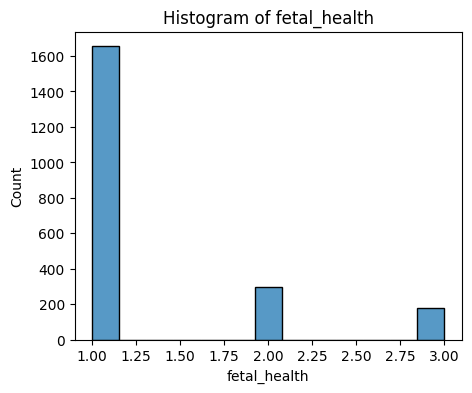

In [62]:
plt.figure(figsize=(5,4))
plt.title('Histogram of fetal_health')
sns.histplot(data=data,x='fetal_health')
#target is clearly imbalanced

<Axes: title={'center': 'Boxplot of the dataset'}>

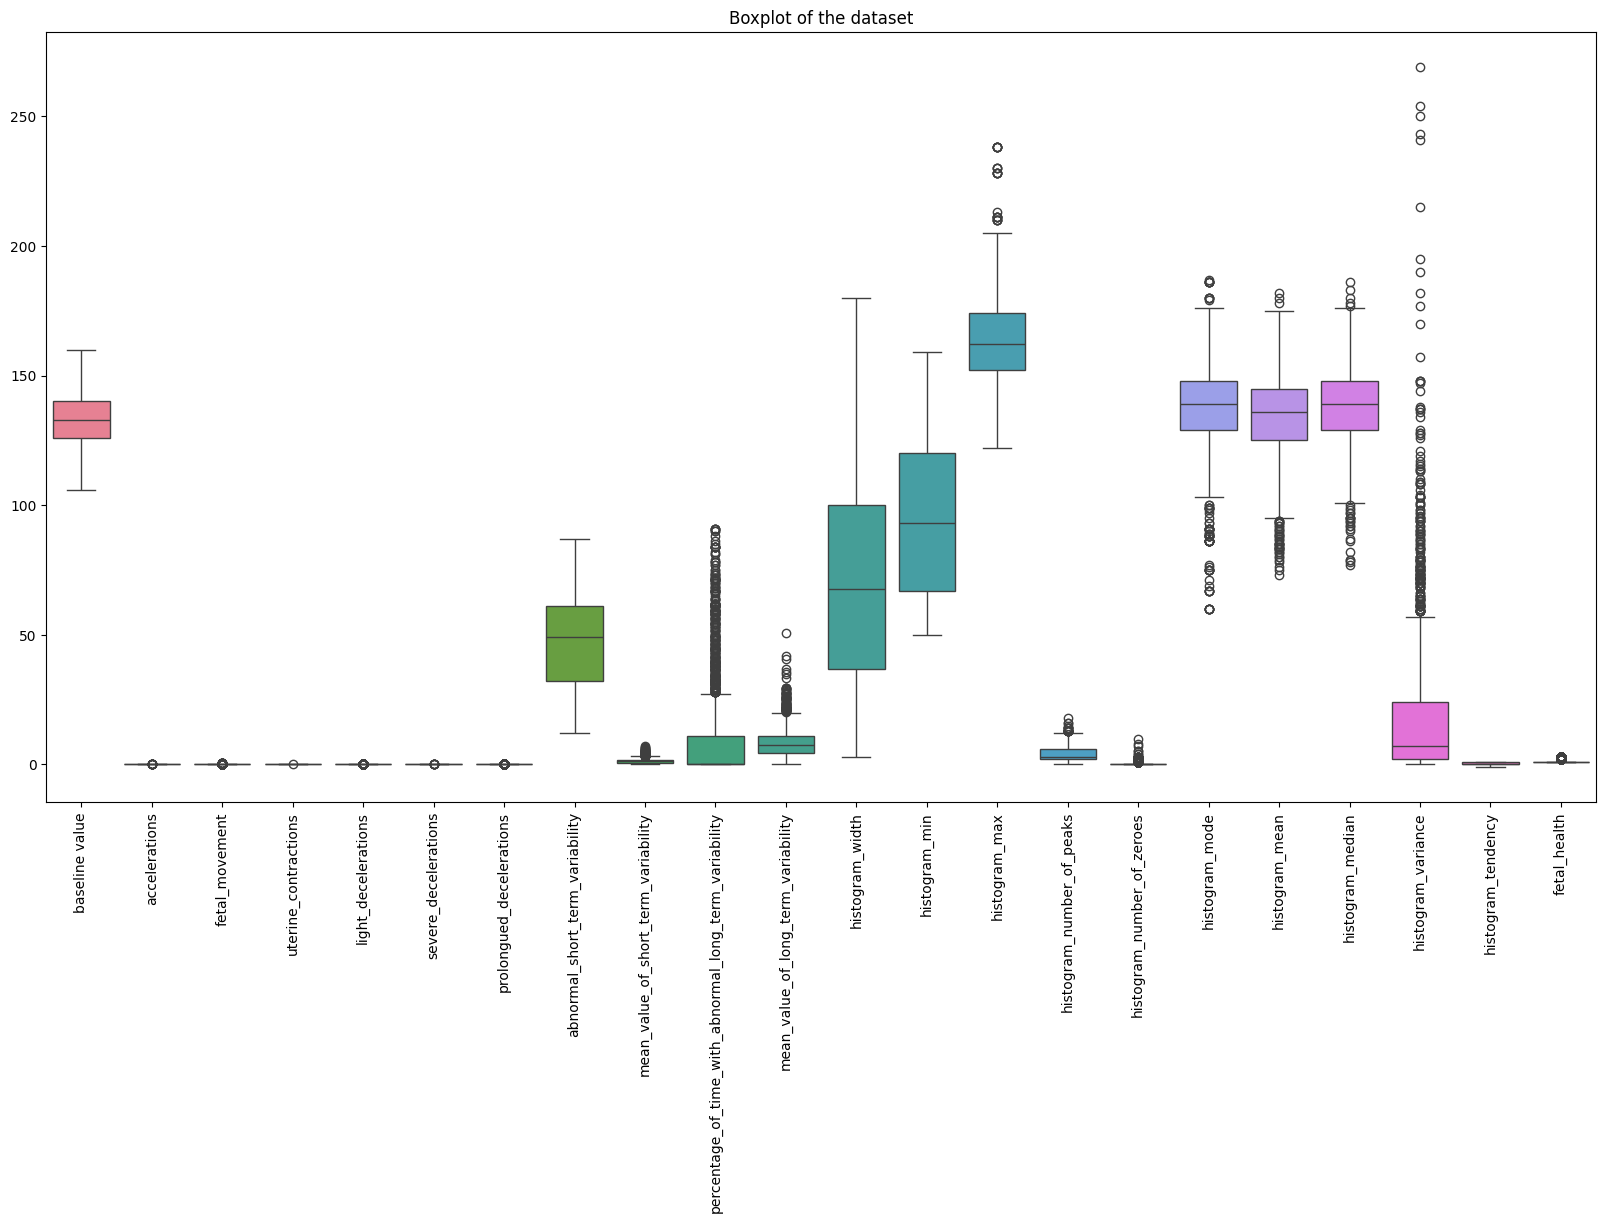

In [64]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of the dataset')
plt.xticks(rotation=90)
sns.boxplot(data=data)

Features in this data do not have the same measuring system, as such, this boxplot is ineffective  
I'll have to examine the columns separately and then scale them. But first, lets see the correlation matrix and identify key features

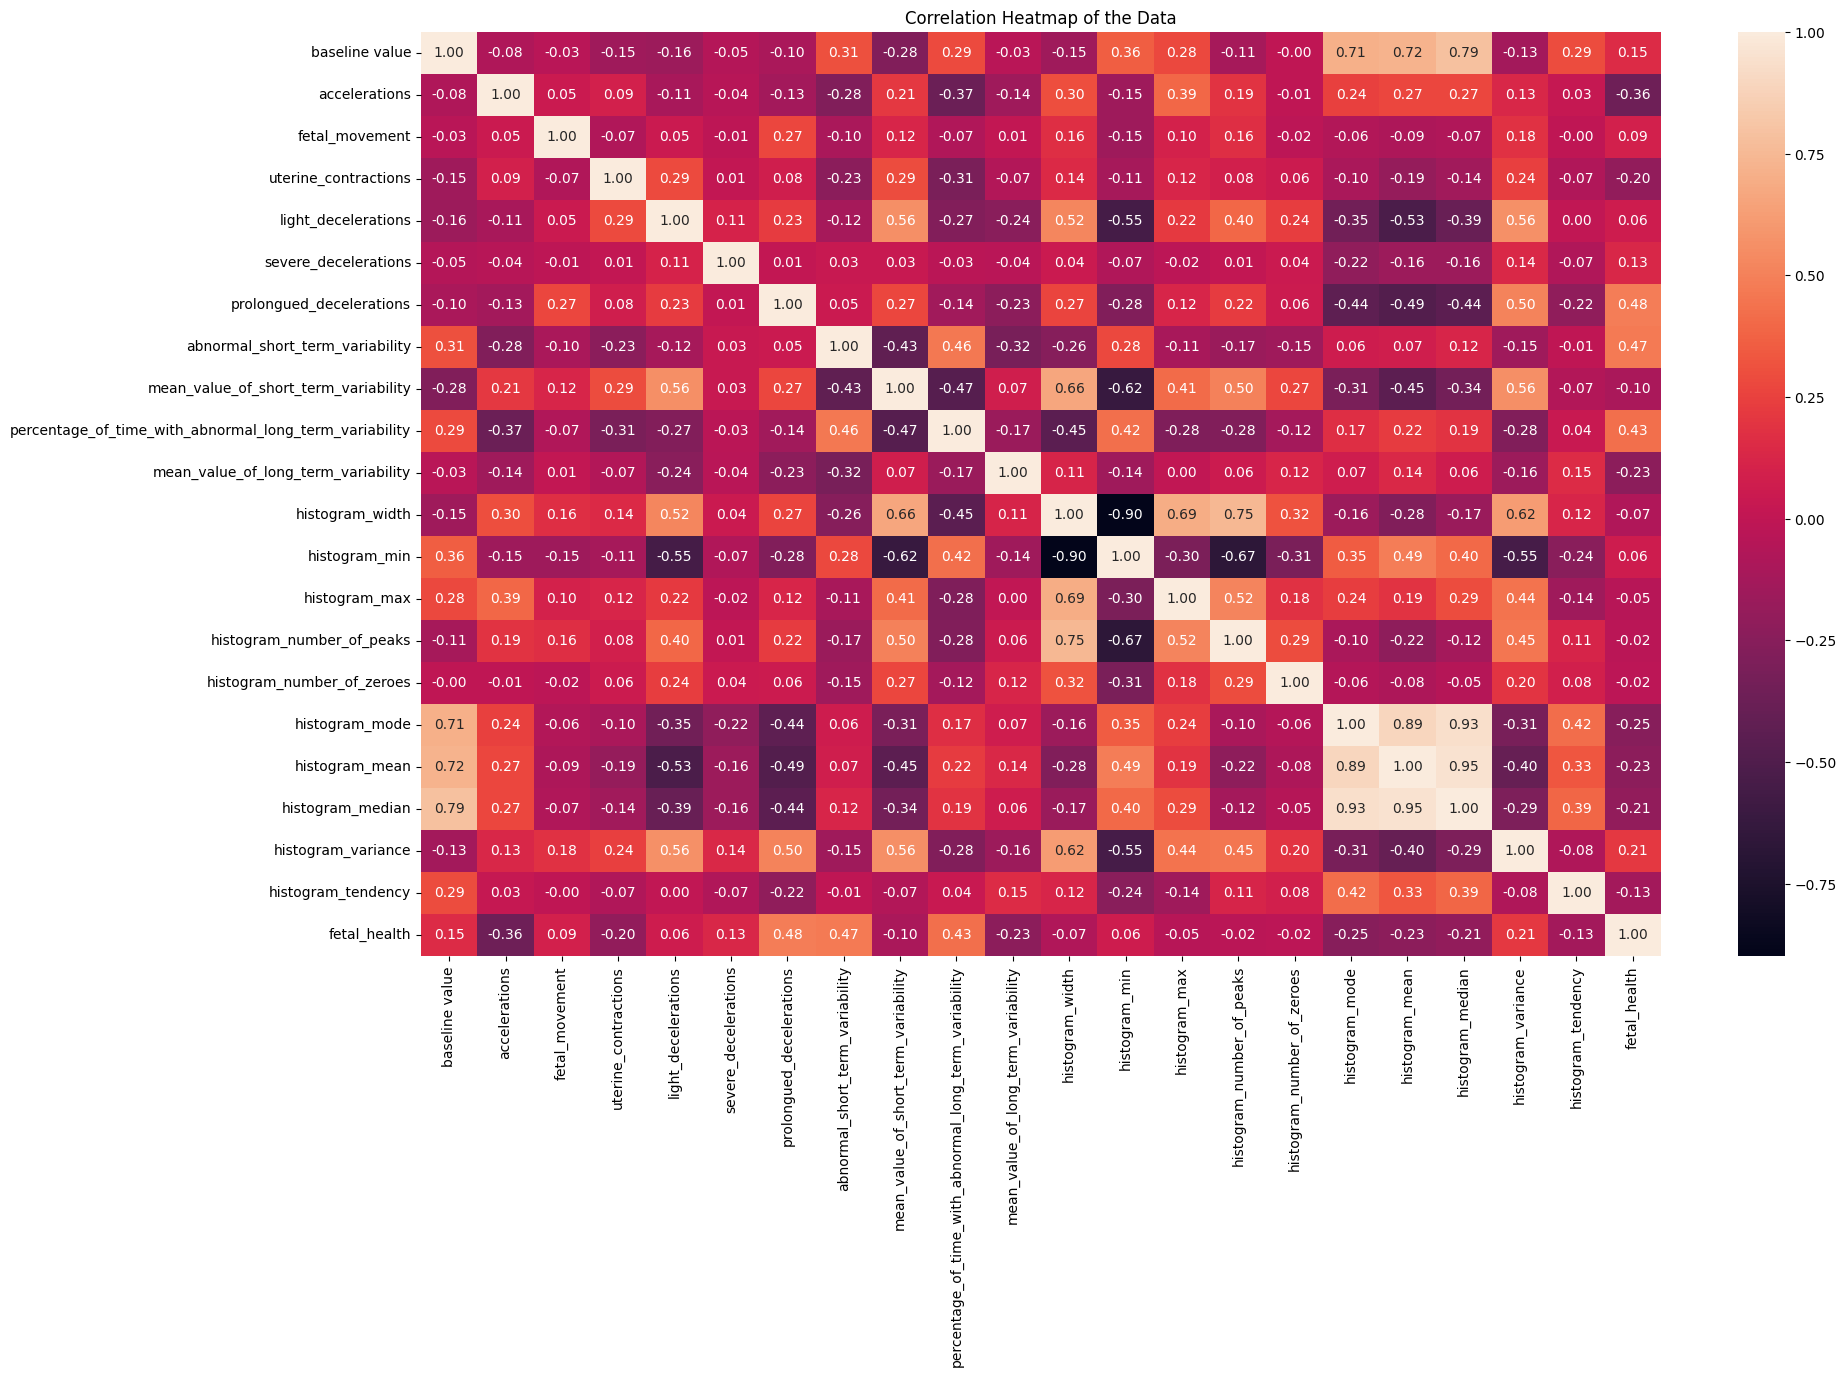

In [66]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of the Data')
plt.show()

As we can see from the correlation matrix, features:
* accelerations 
* prolongued_decelerations 
* abnormal_short_term_variability
* percentage_of_time_with_abnormal_long_term_variability
* mean_value_of_long_term_variability

In [74]:
#There are a lot of columns to explore, so I decided to employ isolation forest to save some time
outliers = IsolationForest(n_estimators=200, random_state=random_state).fit_predict(data.values)
outliers = (outliers+1)//2
data = data.loc[np.array(data.index)[outliers == 1]]
data.shape

(1890, 22)

In [76]:
scaler = StandardScaler()

y = data['fetal_health']
features = data.drop('fetal_health', axis=1)
X = scaler.fit_transform(features)

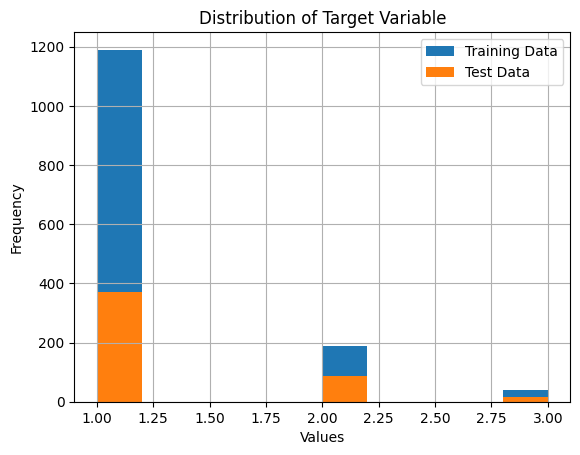

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

y_train.hist(label='Training Data')
y_test.hist(label='Test Data')

#check that all classes are included in train and test
plt.xlabel('fetal_health')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.legend()  
plt.grid(True)
plt.show()

## GridSearch

In [91]:
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, parameters, scoring='accuracy')
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

c:\Users\lebed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lebed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lebed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\lebed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200}


## KNN

In [86]:
model = KNN(n_neighbors = 3, p = 1, weights = 'distance')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accur = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Test accuracy: ", accur)
print("Test precision: ", prec)
print("Test recall: ", recall)

Test accuracy:  0.9281183932346723
Test precision:  0.8972027972027972
Test recall:  0.777927927927928


## Random Forest Classifier

In [89]:
model = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', n_estimators = 300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accur = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Test accuracy: ", accur)
print("Test precision: ", prec)
print("Test recall: ", recall)

Test accuracy:  0.9365750528541226
Test precision:  0.947934472934473
Test recall:  0.8212871962871963


## Gradient Boosting Classifier

In [92]:
model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, max_features = 'log2', n_estimators = 200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accur = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Test accuracy: ", accur)
print("Test precision: ", prec)
print("Test recall: ", recall)

Test accuracy:  0.9556025369978859
Test precision:  0.9388773715290867
Test recall:  0.8980207480207479


# code DUMP